In [318]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

import numpy as np
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"

response = requests.get(url)

data = StringIO(response.text)
df = pd.read_csv(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [320]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [322]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [324]:
Y = pd.get_dummies(Y).values  # y를 원핫 인코딩

X = X.values  #넘파이

In [326]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 20% 만

X_train.shape, X_test.shape, Y

((614, 8),
 (154, 8),
 array([[False,  True],
        [ True, False],
        [False,  True],
        ...,
        [ True, False],
        [False,  True],
        [ True, False]]))

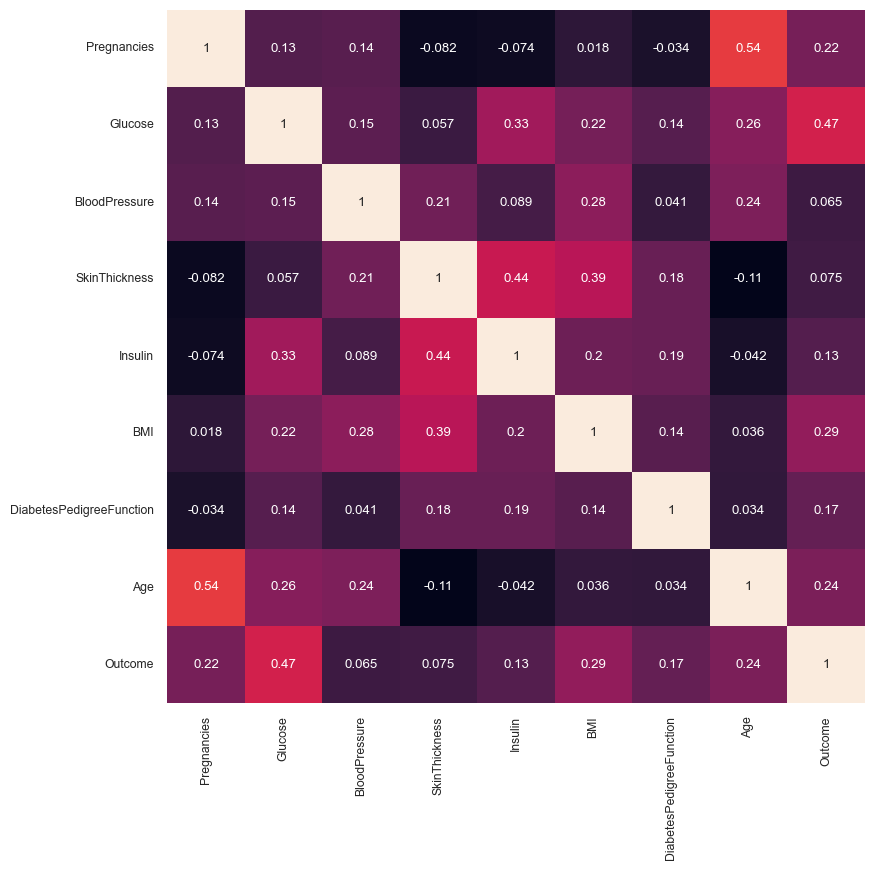

In [328]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(9,9))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [348]:
#Defining the model 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))  # 충분한 표현력 확보
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 0~1 출력

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=['mse'])

C:\Users\chelego\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [354]:
N_EPOCHS = 30

history=model.fit(x=X_train, y=Y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,Y_test))
Y_pred = model.predict(X_test)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3390 - mse: 0.3390 - val_loss: 0.3004 - val_mse: 0.3004
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3327 - mse: 0.3327 - val_loss: 0.3606 - val_mse: 0.3606
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3346 - mse: 0.3346 - val_loss: 0.2987 - val_mse: 0.2987
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3329 - mse: 0.3329 - val_loss: 0.3569 - val_mse: 0.3569
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3122 - mse: 0.3122 - val_loss: 0.2728 - val_mse: 0.2728
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3105 - mse: 0.3105 - val_loss: 0.3508 - val_mse: 0.3508
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3175 - mse: 0.3175 - val_loss: 0.3290 - val_mse: 0.3290
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3162 - mse: 0.3162 - val_loss: 0.3365 - val_mse: 0.3365
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.323

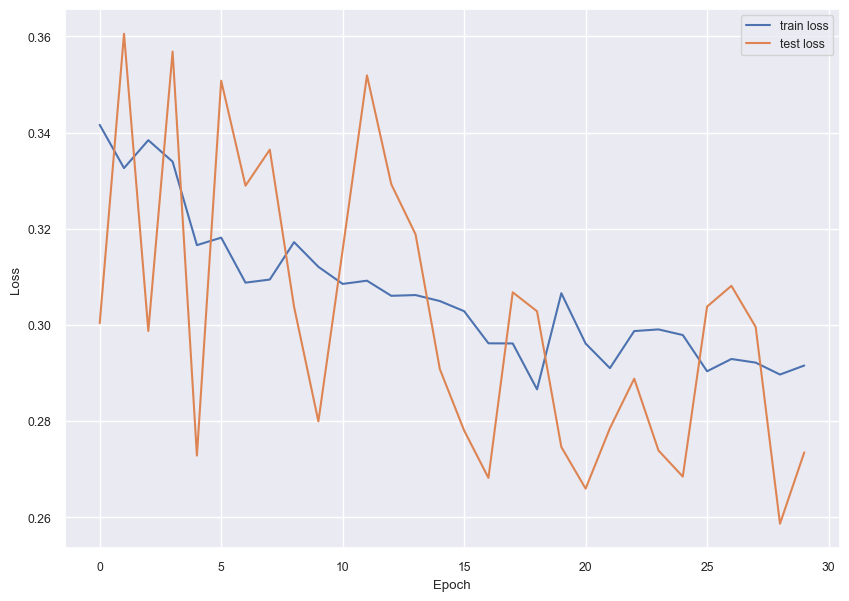

In [356]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [358]:
model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2731 - mse: 0.2731


[0.2735028564929962, 0.2735028564929962]